## Librerias y funciones

In [77]:
import pandas as pd
import seaborn as sns
import re
from matplotlib import pyplot as plt
from scipy import stats
from geopy.geocoders import Nominatim

In [78]:
#FUNCION PARA COMPARAR DENSIDAD DE DISTRIBUCIONES ANTES Y DESPUES DE IMPUTAR
def comparison_dist(data_1:pd.Series, data_2:pd.Series, action:str, x_label:str, fig_size:tuple):
    plt.style.use("bmh")    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=fig_size)

    #GRAFICO 1
    sns.kdeplot(x=data_1, ax=ax[0])
    ax[0].set_title('Distribucion original')
    ax[0].set_xlabel(x_label)

    #GRAFICO 2
    sns.kdeplot(data=data_2, ax=ax[1])
    ax[1].set_xlabel(x_label)
    ax[1].set_title(f'Distribucion despues de {action}') #ACTION(IMPUTAR, ELIMINAR)

    #PLOTEO
    plt.tight_layout()
    plt.show()
    plt.style.use("default")

## Exploracion de dataset

In [79]:
df = pd.read_json('MeliCarPublicactions.json')
df.head(3)

,id,category_id,title,condition,car_year,brand,model,version,engine,engine_power,...,transmission,currency,price,seller_id,seller_nickname,is_car_shop,seller_country,seller_state,seller_city,seller_neighborhood
0,MLA1767503710,MLA1744,Volkswagen Gol Power,Usado,2008,Volkswagen,Gol,1.9 Sd Power 701,1.9,64 hp,...,Manual,USD,5200,1601211580,TIERRADEAUTOS,False,Argentina,Bs.As. G.B.A. Sur,Avellaneda,Villa Domínico
1,MLA1776550792,MLA1744,Volkswagen Gol 2012 1.4 Power Ps+ac 83cv,Usado,2012,Volkswagen,Gol,1.4 Power Ps+ac 83cv,1.4,83 hp,...,Manual,USD,6250,146472306,ARIEL_RICCI,False,Argentina,Capital Federal,Capital Federal,None
2,MLA1776084372,MLA1744,Volkswagen Gol 1.6 I Power /// 2010 - 140.000km,Usado,2010,Volkswagen,Gol,1.6 I Power 701,1.6,92 hp,...,Manual,USD,6000,77745224,CAR.ANT,False,Argentina,Bs.As. G.B.A. Norte,San Isidro,None


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14799 entries, 0 to 14798
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14799 non-null  object 
 1   category_id          14799 non-null  object 
 2   title                14799 non-null  object 
 3   condition            14799 non-null  object 
 4   car_year             14799 non-null  int64  
 5   brand                14799 non-null  object 
 6   model                14799 non-null  object 
 7   version              14799 non-null  object 
 8   engine               14421 non-null  object 
 9   engine_power         13852 non-null  object 
 10  doors                14799 non-null  int64  
 11  km                   14799 non-null  object 
 12  fuel_type            14799 non-null  object 
 13  traction_control     14359 non-null  object 
 14  passenger_capacity   13764 non-null  float64
 15  transmission         14449 non-null  obje

In [81]:
df.describe()

,car_year,doors,passenger_capacity,price,seller_id
count,14799.000000,14799.000000,13764.000000,1.479900e+04,1.479900e+04
mean,2076.321778,8.465977,4.981401,9.635560e+06,3.503775e+08
std,5192.361491,495.159016,0.233632,1.165772e+07,3.885844e+08
min,1990.000000,2.000000,2.000000,1.230000e+02,7.465000e+03
25%,2012.000000,4.000000,5.000000,1.300000e+04,9.690481e+07
50%,2016.000000,4.000000,5.000000,6.743100e+06,2.063930e+08
75%,2021.000000,5.000000,5.000000,1.550000e+07,4.246296e+08
max,460382.000000,60241.000000,7.000000,1.672980e+08,1.813344e+09


## DataWrangling

### Variable ***condition***

In [82]:
#CONTEO DE VALORES UNICOS EN LA VARIABLE
df.condition.value_counts()

condition
Usado    12196
Nuevo     2603
Name: count, dtype: int64

In [83]:
#REEMPLAZO DE VALORES Y CAMBIO DE TIPO DE DATO
df = df.loc[df.condition == 'Usado']
df.drop(columns=['condition'], inplace=True)
df = df.reset_index()

### Variable ***model***

In [84]:
#CHECK DE VALORES UNICOS EN LA VARIABLE
df.model.unique()

array(['Gol', 'Gol Trend', 'Up!', 'Bora', 'Vento', 'Polo', 'Amarok',
       'Golf', 'Corsa', 'Onix', 'Agile', 'Prisma', 'Cruze', 'Aveo G3',
       'Aveo', 'Tracker', 'Clio', 'Sandero', 'Fluence', 'Logan',
       'Kangoo 2', 'Captur', 'Kangoo', 'Master', 'Captur Bose', 'Duster',
       '206', '207', '208', '307', '308', '407', '408', 'Cronos', 'Pulse',
       'Argo', 'ARGO PRECISION 1.8', 'Toro', 'Palio', 'Siena', 'Uno',
       'Fiesta', 'Ecosport', 'Ka', 'Ranger', 'Ranger Raptor',
       'RANGER FX4', 'Focus III', 'Focus II', 'Focus', 'Focus 2',
       'Focus 5p AT SE PLUS', 'Etios', 'Hilux', 'Hilux Pick-Up', 'SW4',
       'Hilux SW4', 'Corolla', 'Yaris', 'Civic', 'City', 'CR-V', 'Zr-v',
       'HR-V', 'CRV'], dtype=object)

In [85]:
#REEMPLAZO DE VALORES
df.model = df.model.str.replace(r'.*Argo.*|.*ARGO.*', 'Argo', regex=True)
df.model = df.model.str.replace(r'.*Captur.*|.*CAPTUR.*', 'Captur', regex=True)
df.model = df.model.str.replace(r'.*Focus.*|.*FOCUS.*|.*focus.*', 'Focus', regex=True)
df.model = df.model.str.replace(r'.*Ranger.*|.*RANGER.*', 'Ranger', regex=True)
df.model = df.model.str.replace(r'.*Hilux.*|.*HILUX.*', 'Hilux', regex=True)
df.model = df.model.str.replace(r'.*Fiesta.*|.*FIESTA.*', 'Fiesta', regex=True)
df.model = df.model.str.replace(r'.*Aveo.*|.*AVEO.*', 'Aveo', regex=True)
df.model = df.model.str.replace(r'.*Kangoo.*', 'Kangoo', regex=True)
df.model = df.model.str.replace('SW4', 'Hilux')
df.model = df.model.str.replace('CRV', 'CR-V')
df.model.unique()

array(['Gol', 'Gol Trend', 'Up!', 'Bora', 'Vento', 'Polo', 'Amarok',
       'Golf', 'Corsa', 'Onix', 'Agile', 'Prisma', 'Cruze', 'Aveo',
       'Tracker', 'Clio', 'Sandero', 'Fluence', 'Logan', 'Kangoo',
       'Captur', 'Master', 'Duster', '206', '207', '208', '307', '308',
       '407', '408', 'Cronos', 'Pulse', 'Argo', 'Toro', 'Palio', 'Siena',
       'Uno', 'Fiesta', 'Ecosport', 'Ka', 'Ranger', 'Focus', 'Etios',
       'Hilux', 'Corolla', 'Yaris', 'Civic', 'City', 'CR-V', 'Zr-v',
       'HR-V'], dtype=object)

### Variable ***engine***

#### Conversion de tipo de dato

In [86]:
#CHECK DE VALORES UNICOS DE LA VARIABLE
df.engine.unique()

array(['1.9', '1.4', '1.6', None, '1.0', '1.8', 'INYECCION MULTI PUNTO',
       '1,6', '4 cilindros', '2.0', '1', 'MSI 1.6 16 válvulas 110cv', '2',
       '2.5', '1.4 Tsi', '1.4 Turbo', '1.4 tsi', 'TURBO DIESEL INYECCION',
       'MSI 1.6 16V', 'TDi', 'nafta', '1.6 MSI', '3.0', 'V6 3.0 258cv',
       'TURBOALIMENTADO', '1.4 turbo', '2.0 Tsi', '1.7', '1.2',
       '1.0 TURBO', '14', '1,4', 'NAFTA', '1.4 T', '1.4L turbo',
       '1.4 TURBO',
       '1.6 DOCH (Inyección multipunto); 4 cil / 16 v; 103 CV',
       '3 en línea 12 v', '1.2 turbo', '1.5', '1,2', 'NAFTA 1.2', '1.6L',
       '1.6l', '1.6 8v', '1.6 8V', '2.3', '1-6 16v', '1.6 Turbo',
       '1.6 thp', '2.2', '1.3', '1.8 Evo', '1.8 ETORQ EVO NAFTA', '1.8L',
       'FIAT', '1.3 16v', '1.4 8V', 'Etorq 1.6 16v (cadenero)',
       '1.3  nafta', '1.3 FIREFLY', '1600 cc', '1.6 naftero', 'FORD 2.0',
       '1500 cc', '3.2', '3.0 V6', '3.0L V6', '4', '2.2 L', '2.0L',
       '1.5X', '2.8', '2.8 turbo', '2.4', '2.5 D4D',
       '3.0 TDI (Tu

In [87]:
#SE QUITAN VALORES ALFABETICOS EN LOS DATOS
df.engine = df.engine.str.replace(r'[^0-9.]', '', regex=True)
df.engine = df.engine.str.strip()
df.engine.unique()

array(['1.9', '1.4', '1.6', None, '1.0', '1.8', '', '16', '4', '2.0', '1',
       '1.616110', '2', '2.5', '1.616', '3.0', '63.0258', '1.7', '1.2',
       '14', '1.6416103', '312', '1.5', '12', '1.68', '2.3', '1616',
       '2.2', '1.3', '1.316', '1.48', '1600', '1500', '3.2', '3.06',
       '2.8', '2.4', '2.54', '4.0', '3', '2.7', '1.6261', '2.442'],
      dtype=object)

In [88]:
#FUNCION PARA QUITAR O AGREGAR DECIMALES
def get_engine(engine):
    if (not engine) | (pd.isna(engine)): return None        
    if re.search(r'^[^.]*$', engine): return None        
    
    if re.search(r'^\d\.', engine):
        if len(engine) == 1:
            engine = engine + '.0'
        elif len(engine) > 3:
            engine = engine[:3]
        return engine
    else:
        return None

In [89]:
#APLICACION DE LA FUNCION Y CAMBIO DE TIPO DE DATO
df.engine = df.engine.apply(get_engine)
df.engine = df.engine.astype(float)
df.engine.unique()

array([1.9, 1.4, 1.6, nan, 1. , 1.8, 2. , 2.5, 3. , 1.7, 1.2, 1.5, 2.3,
       2.2, 1.3, 3.2, 2.8, 2.4, 4. , 2.7])

In [90]:
#INFORMACION DE LA VARIABLE
df.engine.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12196 entries, 0 to 12195
Series name: engine
Non-Null Count  Dtype  
--------------  -----  
11454 non-null  float64
dtypes: float64(1)
memory usage: 95.4 KB


#### Revision e Imputacion de datos nulos

In [91]:
#VALORES NULOS
print(f'Cantidad de nulos: {df.engine.isna().sum()}')

Cantidad de nulos: 742


In [92]:
#FUNCION PARA IMPUTAR VALORES DE LA MEDIANA SEGUN EL MODELO DEL VEHICULO
def get_median(model:str)->float:
    condition = (df.model == model) & (df.engine.notna())
    return df.loc[condition, 'engine'].median()

In [93]:
#COPIA DE LA VARIABLE ANTES DE IMPUTAR
engine_nan = df.engine.copy()

#IMPUTACION DE VALORES NULOS
df.engine = df.apply(lambda x:
                     get_median(x.model) if pd.isna(x.engine) else x.engine,
                     axis=1)

In [94]:
#CANTIDAD DE NULOS DESPUES DE LA IMPUTACION
print(f'Cantidad de nulos: {df.engine.isna().sum()}')

Cantidad de nulos: 0


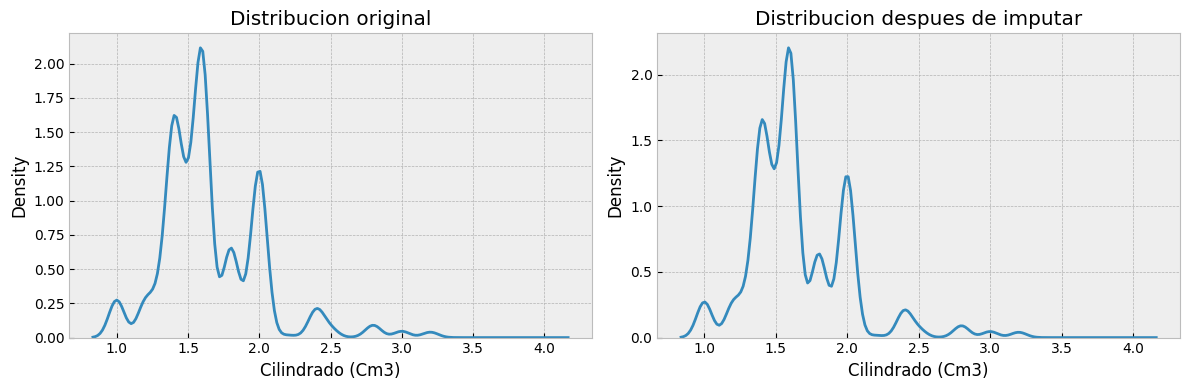

In [95]:
#COMPARACION DE DISTRIBUCIONES
comparison_dist(engine_nan, df.engine, 'imputar', 'Cilindrado (Cm3)',(12,4))

In [96]:
#SE LIBERAN RECURSOS
del engine_nan

### Variable ***engine_power***

#### Conversion de tipo de dato

In [97]:
#CHECK DE VALORES UNICOS EN LA VARIABLE
df.engine_power.unique()

array(['64 hp', '83 hp', '92 hp', None, '90 hp', '54 hp', '98 hp',
       '101 cv', '101 hp', '75 hp', '100 hp', '180 hp', '116 hp',
       '170 hp', '200 hp', '211 hp', '150 hp', '110 hp', '115 hp',
       '140 hp', '105 hp', '105 cv', '224 hp', '258 hp', '163 hp',
       '230 hp', '140 cv', '220 hp', '150 cv', '94 hp', '102 hp', '70 hp',
       '65 hp', '60 hp', '90 cv', '92 cv', '98 cv', '153 hp', '141 hp',
       '103 hp', '132 hp', '172 hp', '75 cv', '74 hp', '145 hp', '115 cv',
       '143 hp', '190 hp', '110 cv', '85 hp', '114 hp', '130 hp',
       '143 cv', '138 hp', '156 hp', '106 hp', '165 hp', '89 hp',
       '152 hp', '225 hp', '270 hp', '165 cv', '216 hp', '136 hp',
       '160 hp', '139.2 hp', '99 hp', '175 hp', '130 cv', '99 cv',
       '170 cv', '82 hp', '87 hp', '72 hp', '82 cv', '68 hp', '95 hp',
       '120 cv', '123 hp', '123 cv', '107 hp', '120 hp', '63 hp',
       '125 hp', '250 hp', '210 hp', '213 hp', '166 hp', '397 hp',
       '99.2 hp', '97 hp', '125 cv', '103

In [98]:
#SE QUITA PARTE ALFABETICA DE VARIABLE Y SE CAMBIA TIPO DE DATO
df.engine_power = df.engine_power.str.replace(r'hp|cv', '', regex=True)
df.engine_power = df.engine_power.str.strip()
df.engine_power = df.engine_power.astype(float)
df.engine_power.unique()

array([ 64. ,  83. ,  92. ,   nan,  90. ,  54. ,  98. , 101. ,  75. ,
       100. , 180. , 116. , 170. , 200. , 211. , 150. , 110. , 115. ,
       140. , 105. , 224. , 258. , 163. , 230. , 220. ,  94. , 102. ,
        70. ,  65. ,  60. , 153. , 141. , 103. , 132. , 172. ,  74. ,
       145. , 143. , 190. ,  85. , 114. , 130. , 138. , 156. , 106. ,
       165. ,  89. , 152. , 225. , 270. , 216. , 136. , 160. , 139.2,
        99. , 175. ,  82. ,  87. ,  72. ,  68. ,  95. , 120. , 123. ,
       107. ,  63. , 125. , 250. , 210. , 213. , 166. , 397. ,  99.2,
        97. , 204. , 177. , 171. , 238. , 134. , 272. , 127. , 154. ,
       185. , 146. ])

In [99]:
#INFO DE LA VARIABLE
df.engine_power.info()

<class 'pandas.core.series.Series'>
RangeIndex: 12196 entries, 0 to 12195
Series name: engine_power
Non-Null Count  Dtype  
--------------  -----  
11398 non-null  float64
dtypes: float64(1)
memory usage: 95.4 KB


#### Imputacion de datos nulos

In [100]:
#CANTIDAD DE VALORES NULOS EN LA VARIABLE
print(f'Cantidad de nulos: {df.engine_power.isna().sum()}')

Cantidad de nulos: 798


In [101]:
#COPIA DELA VARIABLE SIN IMPUTAR
engine_power_nan = df.engine_power.copy()

In [102]:
#FUNCION PARA EXTRAER LA MODA DE LA VARIABLE ENGINE SEGUN EL MODELO DEL VEHICULO
def get_mode(filter:str, var_name:str):
    condition = (df.model == filter) & (df[var_name].notna())
    mode = df.loc[condition, var_name].mode()[0]
    return mode if mode is not None else None

In [103]:
#IMPUTACION DE DATOS NULOS
df.engine_power = df.apply(lambda x: 
                           get_mode(x.model, 'engine_power') if pd.isna(x.engine_power) else x.engine_power,
                           axis=1)

print(f'Cantidad de nulos: {df.engine_power.isna().sum()}')

Cantidad de nulos: 0


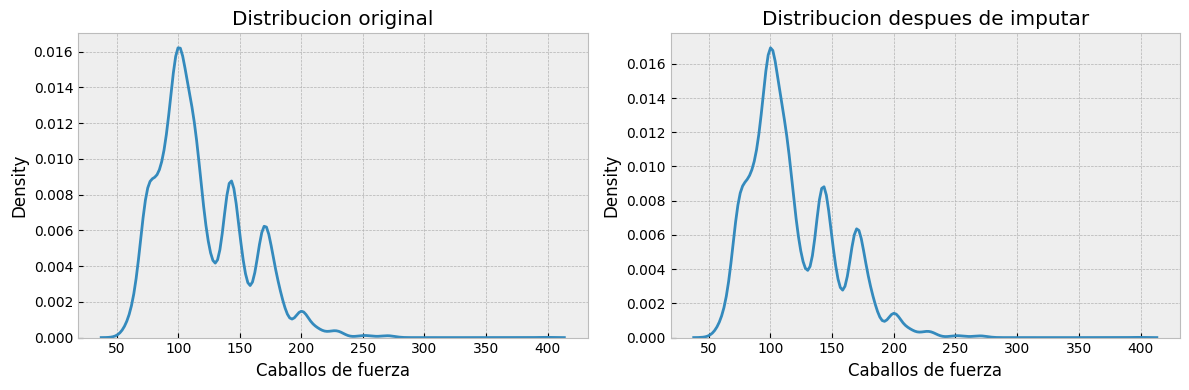

In [104]:
#COMPARACION DE DISTRIBUCIONES
comparison_dist(engine_power_nan, df.engine_power, 'imputar', 'Caballos de fuerza',(12,4))

In [105]:
#SE LIBERAN RECURSOS
del engine_power_nan

### Variable ***km***

In [106]:
#CHEC VALORES DE LA VARIABLE
df.km.head()

0    129069 km
1    137000 km
2    140000 km
3    141000 km
4    112192 km
Name: km, dtype: object

In [107]:
#SE QUITAN VALORES ALFABETICOS DE LA VARIABLE
df.km = df.km.str.replace('km', '')

#SE QUITAN ESPACIOS VACIOS Y SE CAMBIA EL TIPO DE DATO
df.km = df.km.str.strip()
df.km = df.km.astype(int)
df.km.describe()

count     12196.000000
mean     109908.325517
std       68830.359421
min         335.000000
25%       68000.000000
50%      102000.000000
75%      145000.000000
max      999999.000000
Name: km, dtype: float64

In [108]:
#CHECK VALORES ATIPICOS
count = df.loc[df.km > 300000].shape[0]
perc = (count/df.shape[0])*100
print(f'Cantidad de registros mayores de 300.000km: {count}')
print(f'Proporcion del total de datos: {perc:.2f}%')

Cantidad de registros mayores de 300.000km: 123
Proporcion del total de datos: 1.01%


In [109]:
#SE ELIMINAN VALORES OUTLIERS
df = df.loc[df.km < 300000]
df.km.describe()

count     12046.000000
mean     106303.061846
std       58277.965133
min         335.000000
25%       68000.000000
50%      101000.000000
75%      142000.000000
max      299000.000000
Name: km, dtype: float64

### Variable ***fuel_type***

In [110]:
#CHECK VALORES UNICOS DE LA VARIABLE
df.fuel_type.unique()

array(['Diésel', 'Nafta', 'Nafta/GNC', 'GNC', 'Híbrido/Diesel',
       'Eléctrico', 'Híbrido/Nafta', 'Híbrido'], dtype=object)

In [111]:
#REEMPLAZO DE VALORES
df.fuel_type = df.fuel_type.str.replace(r'^GNC$', 'Nafta/GNC', regex=True)
df.fuel_type = df.fuel_type.str.replace(r'^Híbrido$', 'Híbrido/Nafta', regex=True)
df.fuel_type.unique()

array(['Diésel', 'Nafta', 'Nafta/GNC', 'Híbrido/Diesel', 'Eléctrico',
       'Híbrido/Nafta'], dtype=object)

### Variable ***traction_control***

In [112]:
#CHECK DE VALORES UNICOS DE LA VARIABLE
df.traction_control.unique()

array(['Delantera', None, 'Trasera', '4x2', '4x4', 'Integral'],
      dtype=object)

In [113]:
#CHECK DE VALORES NULOS EN LA VARIABLE
print(f'Cantidad de valores nulos en la variable: {df.traction_control.isna().sum()}')

Cantidad de valores nulos en la variable: 401


In [114]:
#IMPUTACION DE VALORES NULOS POR MODA SEGUN EL MODELO DEL VEHICULO
df.traction_control = df.apply( lambda x:
                                get_mode(x.model, 'traction_control') 
                                    if pd.isna(x.traction_control) 
                                    else x.traction_control,
                                axis=1)

#CHECK DE VALORES NULOS DESPUES DE IMPUTAR
print(f'Cantidad de valores nulos en la variable: {df.traction_control.isna().sum()}')

Cantidad de valores nulos en la variable: 0


### Variable ***passenger_capacity***

In [115]:
#INFO DE LA VARIABLE
df.passenger_capacity.describe()

count    11340.000000
mean         4.981217
std          0.235151
min          2.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          7.000000
Name: passenger_capacity, dtype: float64

In [116]:
#CHECK DE VALORES NULOS EN LA VARIABLE
print(f'Cantidad de valores nulos en la variable: {df.passenger_capacity.isna().sum()}')

Cantidad de valores nulos en la variable: 706


In [117]:
#IMPUTACION DE VALORES NULOS POR MODA SEGUN EL MODELO DEL VEHICULO
df.passenger_capacity = df.apply(lambda x:
                                 get_mode(x.model, 'passenger_capacity')
                                    if pd.isna(x.passenger_capacity)
                                    else x.passenger_capacity,
                                axis=1)

#CHECK DE VALORES NULOS DESPUES DE IMPUTAR
print(f'Cantidad de valores nulos en la variable: {df.passenger_capacity.isna().sum()}')

Cantidad de valores nulos en la variable: 0


### Variable ***transmission***

In [118]:
#CHECK VALORES UNICOS EN LA VARIABLE
df.transmission.unique()

array(['Manual', None, 'Automática', 'Automática secuencial',
       'No Informa'], dtype=object)

In [120]:
#REEMPLAZO DE VALORES
df.transmission = df.transmission.replace('No Informa', None)

#CHECK VALORES NULOS EN LA VARIABLE
print(f'Cantidad de valores nulos en la variable: {df.transmission.isna().sum()}')

Cantidad de valores nulos en la variable: 333


In [121]:
#IMPUTACION DE VALORES NULOS POR LA MODA SEGUN EL MODELO
df.transmission = df.apply( lambda x:
                            get_mode(x.model, 'transmission')
                                if pd.isna(x.transmission)
                                else x.transmission,
                            axis=1)

#CHECK VALORES NULOS EN LA VARIABLE
print(f'Cantidad de valores nulos en la variable: {df.transmission.isna().sum()}')

Cantidad de valores nulos en la variable: 0


### Variable ***price*** 

#### Unificacion de valor del automovil en moneda USD

In [122]:
#TIPOS DE MONEDAS QUE DESCRIBEN EL PRECIO
df.currency.unique()

array(['USD', 'ARS'], dtype=object)

In [123]:
#SE CONVIERTE A USD TODOS AQUELLOS PRECIOS VALUADOS EN PESOS
#A LA FECHA DE RECOPILACION DE DATOS:  1 USD = 1255 ARS
df.price = df.price.astype(float)
df.loc[df.currency == 'ARS', 'price'] = df.price.apply(lambda x: x/1255)

In [124]:
#SE RENOMBRA LA VARIABLE PRICE
df.rename(columns={'price': 'usd_price'}, inplace=True)

#SE ELIMINA LA VARIABLE CURRENCY
df.drop(columns='currency', inplace=True)
df.usd_price.describe()

count     12046.000000
mean      11298.901060
std        7853.219077
min          79.681275
25%        6533.864542
50%        9500.000000
75%       13944.223108
max      350000.000000
Name: usd_price, dtype: float64

#### Valores atipicos

In [125]:
#SE EVALUA LA CANTIDAD DE VEHICULOS CPN PRECIOS POR ARRIVA DE LOS 100.000USD
df.loc[df.usd_price > 100000, ['brand', 'model', 'usd_price']].round(2)

,brand,model,usd_price
298,Volkswagen,Gol,350000.0


In [126]:
#SE ELIMINAN LOS PRECIOS MAYORES A 100.000USD
df = df.loc[df.usd_price < 100000]

#CHECK DE VALORES
print(f'Precios mayores a 100.000 USD: {df.loc[df.usd_price > 100000].shape[0]}')

Precios mayores a 100.000 USD: 0


In [127]:
#INFO DE LA VARIABLE
df.usd_price.describe()

count    12045.000000
mean     11270.781417
std       7221.664282
min         79.681275
25%       6533.864542
50%       9500.000000
75%      13944.223108
max      89900.000000
Name: usd_price, dtype: float64

### Variable ***seller_state***

In [128]:
#CHECK DE VALORES UNICOS EN LA VARIABLE
df.seller_state.unique()

array(['Bs.As. G.B.A. Sur', 'Capital Federal', 'Bs.As. G.B.A. Norte',
       'Bs.As. G.B.A. Oeste', 'Córdoba', 'Entre Ríos', 'Formosa',
       'Buenos Aires Interior', 'San Luis', 'Corrientes',
       'Bs.As. Costa Atlántica', 'Santa Fe', 'Mendoza', 'Río Negro',
       'Chaco', 'Misiones', 'Neuquén', 'Chubut', 'Salta',
       'Santiago del Estero', 'Santa Cruz', 'La Pampa', 'Tucumán',
       'Tierra del Fuego', 'Jujuy', 'San Juan', 'Catamarca', 'La Rioja'],
      dtype=object)

In [129]:
#REEMPLAZO DE VALORES
df.seller_state = df.seller_state.str.replace(r'.*Bs\.As.*', 'Buenos Aires', regex=True)
df.seller_state = df.seller_state.str.replace('Buenos Aires Interior', 'Buenos Aires')
df.seller_state.unique()

array(['Buenos Aires', 'Capital Federal', 'Córdoba', 'Entre Ríos',
       'Formosa', 'San Luis', 'Corrientes', 'Santa Fe', 'Mendoza',
       'Río Negro', 'Chaco', 'Misiones', 'Neuquén', 'Chubut', 'Salta',
       'Santiago del Estero', 'Santa Cruz', 'La Pampa', 'Tucumán',
       'Tierra del Fuego', 'Jujuy', 'San Juan', 'Catamarca', 'La Rioja'],
      dtype=object)

In [130]:
#CHECK DE VALORES NULOS
print(f'Cantidad de datos nulos en la variable: {df.seller_state.isna().sum()}')

Cantidad de datos nulos en la variable: 0


### Variables ***latitude*** y ***longitude***

In [131]:
#FUNCION PARA OBTENER LAS COORDENADAS DE UNA CIUDAD
def get_location(city, state, country):
    geolocator = Nominatim(user_agent='getLocation')
    location_string = city + ', ' + state + ', '+ country
    location = geolocator.geocode(location_string)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None

In [132]:
#SE AGRUPAN LOS VALORES DE LA CIUDAD PARA REDUCIR LAS CONSULTAS
df_location = df.groupby(['seller_country', 'seller_state', 'seller_city'])['seller_city'].size().reset_index(name='count')
df_location.head()

,seller_country,seller_state,seller_city,count
0,Argentina,Buenos Aires,25 de Mayo,3
1,Argentina,Buenos Aires,9 de Julio,15
2,Argentina,Buenos Aires,Almirante Brown,160
3,Argentina,Buenos Aires,Arrecifes,7
4,Argentina,Buenos Aires,Avellaneda,371


In [133]:
#OBTENCION DE COORDENADAS PARA LAS CIUDADES
df_location[['Latitude', 'longitude']] = df_location.apply( lambda x: 
                                                            pd.Series(get_location( x.seller_city,x.seller_state,x.seller_country)),
                                                            axis=1)

#SE ELIMINA LA COLUMNA PAIS YA QUE TIENE UN SOLO VALOR
df_location.drop(columns=['seller_country', 'count'], inplace=True)
df_location.head()

,seller_state,seller_city,Latitude,longitude
0,Buenos Aires,25 de Mayo,-33.315252,-60.241599
1,Buenos Aires,9 de Julio,-35.443920,-60.884584
2,Buenos Aires,Almirante Brown,-34.579634,-60.967745
3,Buenos Aires,Arrecifes,-34.067204,-60.102995
4,Buenos Aires,Avellaneda,-34.664839,-58.362806


In [134]:
#SE UNEN LOS DATAFRAME
df = pd.merge(df, df_location, on=['seller_state', 'seller_city'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12045 entries, 0 to 12044
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                12045 non-null  int64  
 1   id                   12045 non-null  object 
 2   category_id          12045 non-null  object 
 3   title                12045 non-null  object 
 4   car_year             12045 non-null  int64  
 5   brand                12045 non-null  object 
 6   model                12045 non-null  object 
 7   version              12045 non-null  object 
 8   engine               12045 non-null  float64
 9   engine_power         12045 non-null  float64
 10  doors                12045 non-null  int64  
 11  km                   12045 non-null  int32  
 12  fuel_type            12045 non-null  object 
 13  traction_control     12045 non-null  object 
 14  passenger_capacity   12045 non-null  float64
 15  transmission         12045 non-null 

### Variable ***is_car_shop***

In [135]:
#CHECK DE VALORES UNICOS DE LA VARIABLE
df.is_car_shop = df.is_car_shop.astype(str)
df.is_car_shop.unique()

array(['False', 'True'], dtype=object)

In [136]:
#REEMPLAZO DE VALORES
df.is_car_shop = df.is_car_shop.str.replace('False', '0')
df.is_car_shop = df.is_car_shop.str.replace('True', '1')
df.is_car_shop = df.is_car_shop.astype(int)

### Variables a ***eliminar***

#### Variable ***category_id***

In [137]:
#CHECK DE VALORES UNICOS PARA LA VARIABLE
df.category_id.unique()

array(['MLA1744'], dtype=object)

In [138]:
#SE ELIMINA LA VARIABLE YA QUE SU VALOR SIEMPRE ES EL MISMO
df.drop(columns='category_id', inplace=True)

#### Variable ***title***

In [139]:
#SE ELIMINA LA VARIABLE
df.drop(columns='title', inplace=True)

#### Variables ***seller_id***, ***seller_nickname*** y ***seller_neighborhood***

In [140]:
#SE ELIMINAN LAS VARIABLES DEL VENDEDOR QUE APORTAN VALOR
df.drop(columns=['seller_id', 'seller_nickname', 'seller_neighborhood'], inplace=True)

### Tratamiento de variables ***cualitativas***

In [141]:
#SE MUESTRAN LA CANTIDAD DE VALORES UNICOS PARA LAS VARIABLES CUALITATIVAS
not_var = ['id','seller_state','seller_city','seller_country']

cat_var = [col for col in df.columns if (col not in not_var) and (df[col].dtype == 'object')]

for var in cat_var:
    print(f'{var}: {df[var].nunique()} valores unicos')

brand: 8 valores unicos
model: 51 valores unicos
version: 1972 valores unicos
fuel_type: 6 valores unicos
traction_control: 5 valores unicos
transmission: 3 valores unicos


In [142]:
#IMPORTACION DE LIBRERIA
from sklearn.preprocessing import LabelEncoder

#CODIFICACION DE VARIABLES CUALITATIVAS
for var in cat_var:
    if var != 'version':
        pos_var = df.columns.get_loc(var)+1
        name_var = var+'_cod'
        df.insert(column=name_var, loc=pos_var, value=LabelEncoder().fit_transform(df[var]))

In [143]:
#INFO DE LA VARIABLE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12045 entries, 0 to 12044
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 12045 non-null  int64  
 1   id                    12045 non-null  object 
 2   car_year              12045 non-null  int64  
 3   brand                 12045 non-null  object 
 4   brand_cod             12045 non-null  int32  
 5   model                 12045 non-null  object 
 6   model_cod             12045 non-null  int32  
 7   version               12045 non-null  object 
 8   engine                12045 non-null  float64
 9   engine_power          12045 non-null  float64
 10  doors                 12045 non-null  int64  
 11  km                    12045 non-null  int32  
 12  fuel_type             12045 non-null  object 
 13  fuel_type_cod         12045 non-null  int32  
 14  traction_control      12045 non-null  object 
 15  traction_control_co

### Guardado Provisorio

In [145]:
#df.to_csv('publications_clean.csv', index=False)